In [1]:
import csv
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

#Parameters
MIN_AREA_FOR_STOP = 3
MIN_COMPACTNESS_FOR_BULB = 0.04
LOWER_RED = np.array([90-30,30,40])
UPPER_RED = np.array([90+30,255,255])

image_dir = '../labeled-data/segmented-images'
filenames = []
labels = []
states = []

with open('../labeled-data/labels.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csvreader:
        filenames.append(row[0])
        labels.append(row[1])
        
filepaths = [os.path.join(image_dir,filename)for filename in filenames]


In [2]:
def extract_red_area(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_inv = cv2.bitwise_not(img)
    hsv=cv2.cvtColor(img_inv, cv2.COLOR_RGB2HSV);
    mask = cv2.inRange(hsv, LOWER_RED, UPPER_RED)
    im2, contours,hierarchy = cv2.findContours(mask, 1, 2)
    largest_area = 0
    perimeter = 0
    if(contours):
        for contour in contours:
            area = cv2.contourArea(contour)
            if area>largest_area:
                largest_area=area
                perimeter = cv2.arcLength(contour, True)
    return mask, largest_area, perimeter

for filepath in filepaths:
    img = cv2.imread(filepath)
    mask, area, perimeter = extract_red_area(img)
    if area > MIN_AREA_FOR_STOP and area/(perimeter*perimeter)> MIN_COMPACTNESS_FOR_BULB:
        state = 'stop'
        #print(area/(perimeter*perimeter))
    else:
        state = 'go'
    states.append(state)
        
misclassified_idxs = []
for i in range(len(labels)):
    if states[i] != labels[i]:
        misclassified_idxs.append(i)
   
total_stop = 0
total_stop_missed = 0
for i in range(len(labels)):
    if labels[i]=='stop':
        total_stop = total_stop + 1
        if states[i]!='stop':
            total_stop_missed = total_stop_missed + 1
        
print("Percent misclassified: " + str(100*len(misclassified_idxs)/len(labels)))
print("Percent stop missed: " + str(100*total_stop_missed/total_stop))
        

Percent misclassified: 5.139240506329114
Percent stop missed: 1.7168885774351788


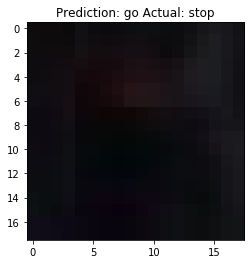

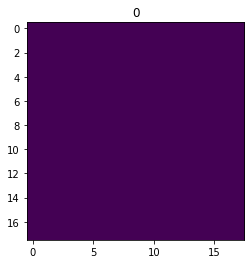

Area: 0
Perimeter: 0
Press Enter to continue...


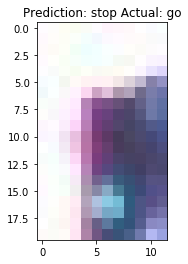

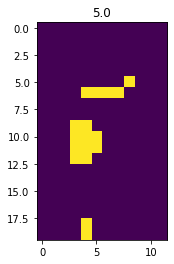

Area: 5.0
Perimeter: 8.828427076339722
Area/Perimeter^2: 0.06415098605453953
Press Enter to continue...


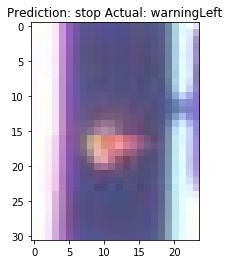

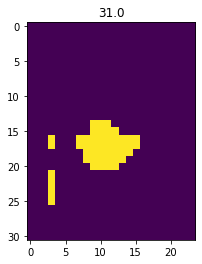

Area: 31.0
Perimeter: 23.313708186149597
Area/Perimeter^2: 0.05703467635618053


In [ ]:
for idx in misclassified_idxs:
    filepath = filepaths[idx]
    img = cv2.imread(filepath)
    mask, area, perimeter = extract_red_area(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title("Prediction: " +states[idx] + " Actual: " + labels[idx])
    plt.show()
    plt.imshow(mask)
    plt.title(area)
    plt.show()
    print("Area: "+str(area) )
    print("Perimeter: "+str(perimeter) )
    if(perimeter>0):
        print("Area/Perimeter^2: "+str(area/(perimeter*perimeter)) )
    #cv2.imshow(states[idx], img)
    input("Press Enter to continue...")
    